           Date       ATR
0    03/01/2022       NaN
1    04/01/2022       NaN
2    05/01/2022       NaN
3    06/01/2022       NaN
4    07/01/2022       NaN
..          ...       ...
496  22/12/2023  5.765717
497  26/12/2023  5.478574
498  27/12/2023  5.200003
499  28/12/2023  5.004288
500  29/12/2023  4.822146

[501 rows x 2 columns]


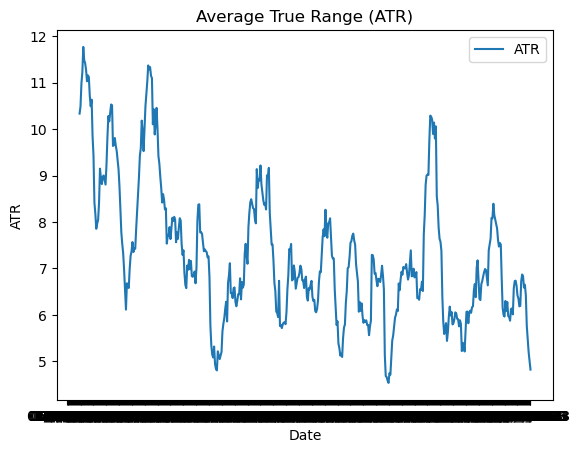

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the true range data 
df = pd.read_csv('microsoftdata.csv')

# Calculate true range (TR) for each row
df['TR'] = np.maximum.reduce([
    df['High'] - df['Low'],
    np.abs(df['High'] - df['Close'].shift(1)),
    np.abs(df['Low'] - df['Close'].shift(1))
])

# Calculate ATR (14-day SMA)
window = 14
df['ATR'] = df['TR'].rolling(window=window).mean()

# Print the ATR values 
print(df[['Date', 'ATR']])

# plot ATR for visualization
plt.plot(df['Date'], df['ATR'], label='ATR')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.title('Average True Range (ATR)')
plt.legend()
plt.show()


In [9]:
# Generate buy and sell signals based on ATR
df['Signal'] = np.where(df['Close'] > df['ATR'], 'BUY', 'SELL')

# Print the ATR values along with buy and sell signals
print(df[['Date', 'ATR', 'Signal']])

           Date       ATR Signal
0    03/01/2022       NaN   SELL
1    04/01/2022       NaN   SELL
2    05/01/2022       NaN   SELL
3    06/01/2022       NaN   SELL
4    07/01/2022       NaN   SELL
..          ...       ...    ...
496  22/12/2023  5.765717    BUY
497  26/12/2023  5.478574    BUY
498  27/12/2023  5.200003    BUY
499  28/12/2023  5.004288    BUY
500  29/12/2023  4.822146    BUY

[501 rows x 3 columns]
